In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
data_file_name = 'data-v11-07-08-29-06-22'
df_dirty = pd.read_csv('data/'+ data_file_name +'.csv', encoding= 'ISO-8859-8')

# Remove outliers and remove nan functions:

In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [4]:
def remove_nan_rows(data,col):
    data = data.dropna(subset = ['PPSQM'])
    return data

In [5]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36935 non-null  int64  
 1   DealYear    36935 non-null  float64
 2   DealMonth   36935 non-null  float64
 3   Date        36935 non-null  object 
 4   Area        36935 non-null  object 
 5   Address     27817 non-null  object 
 6   Rooms       32762 non-null  float64
 7   Surface     32501 non-null  float64
 8   Floor       20549 non-null  float64
 9   Price       36895 non-null  object 
 10  PPSQM       32364 non-null  object 
 11  BuildYear   32763 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 3.4+ MB


# Handling data types
## Creating a clean Data Frame by removing outliers and nan values

In [6]:
df_dirty = remove_nan_rows(df_dirty,'PPSQM')

#handle columns types
df_dirty['PPSQM'] = df_dirty['PPSQM'].astype(str).str.replace(',', '').astype(int)
df_dirty['DealYear'] = df_dirty['DealYear'].astype(int)
df_dirty['Price'] = df_dirty['Price'].astype(str).str.replace(',', '').astype(int)

areas = df_dirty.Area.unique()
df_clean= pd.DataFrame({'DealYear': [],'DealMonth': [],'Date': [],'Area':[],'Address': [],'Rooms':[],'Surface':[],
                        'Floor':[],'Price':[],'PPSQM':[],'BuildYear': []})

for area in areas:
    df_temp = df_dirty.loc[df_dirty['Area'] == area]
    df_temp = remove_outlier(df_temp,'PPSQM')
    df_clean = pd.concat([df_clean,df_temp],ignore_index=True)
    
df_dirty['PPSQM'] = df_dirty['PPSQM'].astype(str).str.replace(',', '').astype(int)

#creating a cleaned csv file
fileName = data_file_name + '_cleaned'
df_clean.to_csv('data/'+ fileName + '.csv', encoding = "ISO-8859-8")

# Showing the differences between a dirty Data Frame and a clean one

In [7]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32364 entries, 1 to 36934
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32364 non-null  int64  
 1   DealYear    32364 non-null  int32  
 2   DealMonth   32364 non-null  float64
 3   Date        32364 non-null  object 
 4   Area        32364 non-null  object 
 5   Address     24731 non-null  object 
 6   Rooms       32362 non-null  float64
 7   Surface     32364 non-null  float64
 8   Floor       20269 non-null  float64
 9   Price       32364 non-null  int32  
 10  PPSQM       32364 non-null  int32  
 11  BuildYear   32363 non-null  float64
dtypes: float64(5), int32(3), int64(1), object(3)
memory usage: 2.8+ MB


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30986 entries, 0 to 30985
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DealYear    30986 non-null  float64
 1   DealMonth   30986 non-null  float64
 2   Date        30986 non-null  object 
 3   Area        30986 non-null  object 
 4   Address     23701 non-null  object 
 5   Rooms       30985 non-null  float64
 6   Surface     30986 non-null  float64
 7   Floor       19651 non-null  float64
 8   Price       30986 non-null  float64
 9   PPSQM       30986 non-null  float64
 10  BuildYear   30986 non-null  float64
 11  Unnamed: 0  30986 non-null  float64
dtypes: float64(9), object(3)
memory usage: 2.8+ MB


# Visualization of the outliers dropped

## Before cleaning:

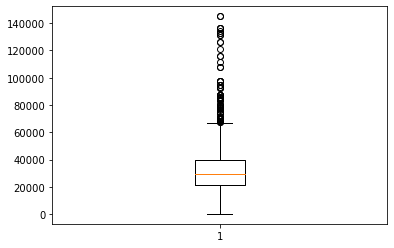

In [9]:
plt.boxplot(df_dirty.loc[df_dirty['Area'] == 'tel-aviv-area']['PPSQM'])
plt.show()

## After cleaining:


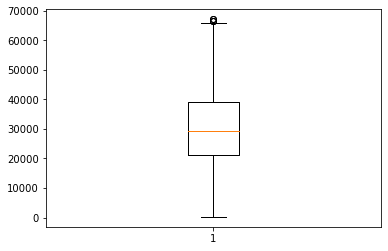

In [10]:
plt.boxplot(df_clean.loc[df_clean['Area'] == 'tel-aviv-area']['PPSQM'])
plt.show()

tel-aviv-area Before cleaning


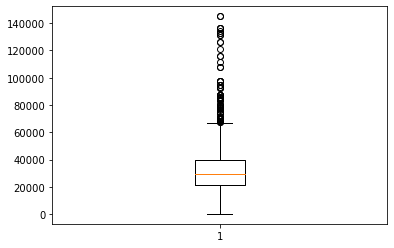

tel-aviv-area After cleaning


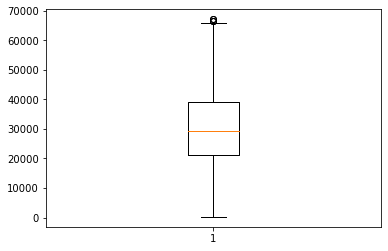

holon-bat-yam Before cleaning


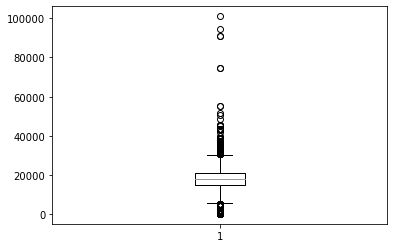

holon-bat-yam After cleaning


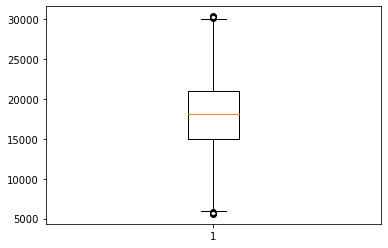

ramat-gan-givatayim Before cleaning


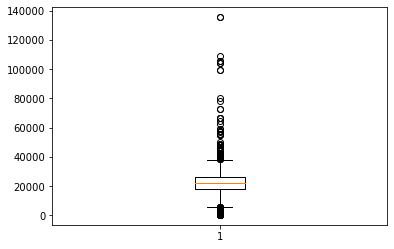

ramat-gan-givatayim After cleaning


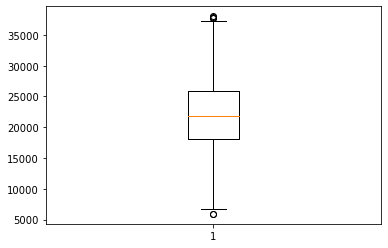

ramat-hasharon-herzliya Before cleaning


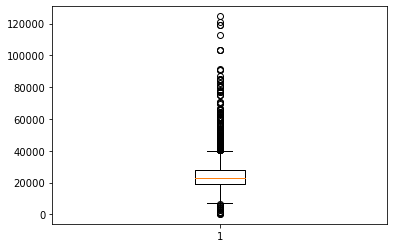

ramat-hasharon-herzliya After cleaning


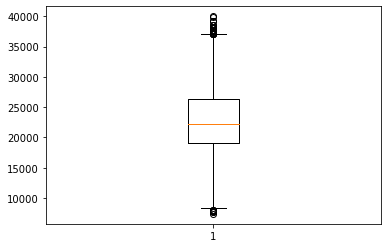

rishon-lezion-area Before cleaning


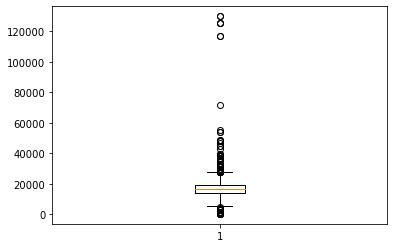

rishon-lezion-area After cleaning


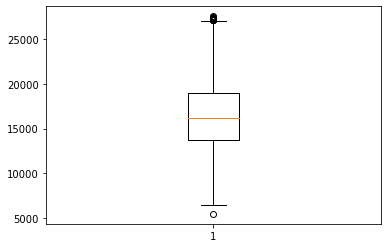

ness-ziona-rehovot Before cleaning


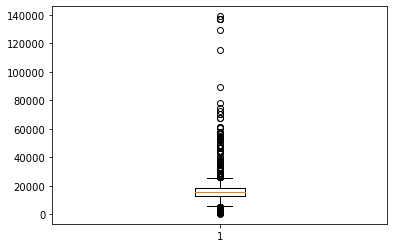

ness-ziona-rehovot After cleaning


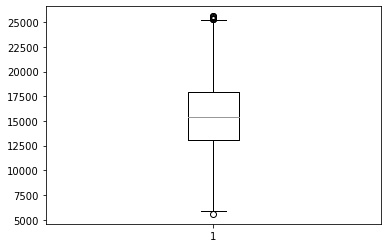

ramla-lod Before cleaning


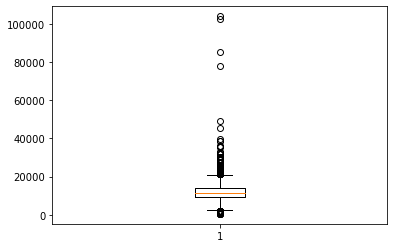

ramla-lod After cleaning


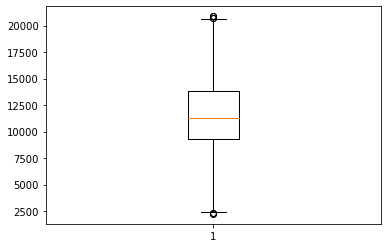

petah-tikva-area Before cleaning


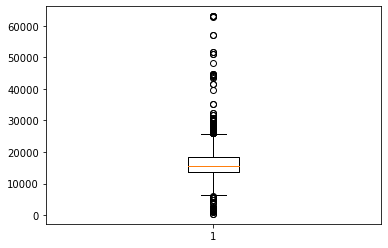

petah-tikva-area After cleaning


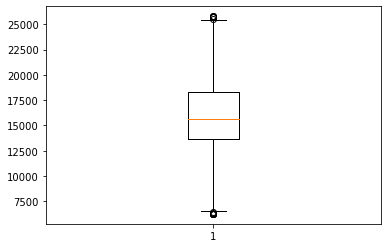

hod-hasharon-area Before cleaning


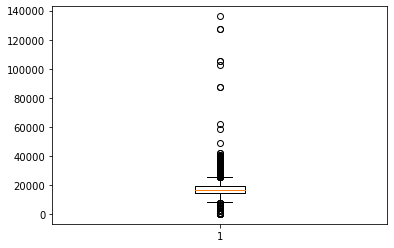

hod-hasharon-area After cleaning


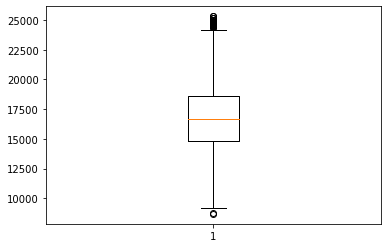

raanana-kfar-saba Before cleaning


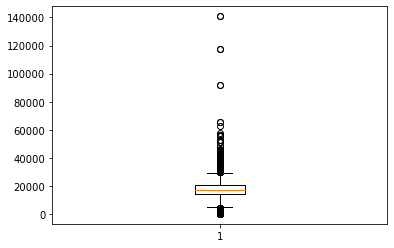

raanana-kfar-saba After cleaning


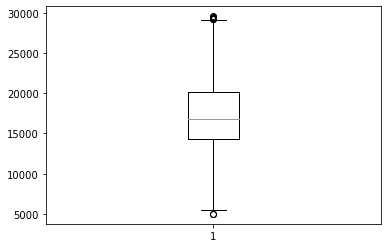

In [12]:
areasList = ['tel-aviv-area','holon-bat-yam','ramat-gan-givatayim','ramat-hasharon-herzliya','rishon-lezion-area',
                 'ness-ziona-rehovot','ramla-lod','petah-tikva-area','hod-hasharon-area','raanana-kfar-saba']

for area in areasList:
    print(area,'Before cleaning')
    plt.boxplot(df_dirty.loc[df_dirty['Area'] == area]['PPSQM'])
    plt.show()
    print(area,'After cleaning')
    plt.boxplot(df_clean.loc[df_clean['Area'] == area]['PPSQM'])
    plt.show()

# The new cleaned Data Frame:

In [13]:
df_clean

,DealYear,DealMonth,Date,Area,Address,Rooms,Surface,Floor,Price,PPSQM,BuildYear,Unnamed: 0
0,2010.0,12.0,31/12/2010,tel-aviv-area,מלצ''ט 36,5.0,128.0,NaN,950000.0,7421.0,1999.0,1.0
1,2010.0,12.0,31/12/2010,tel-aviv-area,קרליבך 1,3.0,82.0,4.0,2096120.0,25562.0,2013.0,2.0
2,2010.0,12.0,31/12/2010,tel-aviv-area,קרליבך 1,3.0,91.0,1.0,1898195.0,20859.0,2013.0,3.0
3,2010.0,12.0,31/12/2010,tel-aviv-area,קרליבך 1,5.0,121.0,12.0,3146500.0,26004.0,2013.0,4.0
4,2010.0,12.0,31/12/2010,tel-aviv-area,אב 1,5.0,125.0,18.0,7996764.0,63974.0,2011.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30981,2020.0,1.0,14/1/2020,raanana-kfar-saba,ברנדיס 1,5.0,184.0,8.0,4940000.0,26847.0,2019.0,36930.0
30982,2020.0,1.0,14/1/2020,raanana-kfar-saba,ששת הימים 24,4.0,100.0,6.0,1900000.0,19000.0,2019.0,36931.0
30983,2020.0,1.0,10/1/2020,raanana-kfar-saba,NaN,5.0,173.0,NaN,3200000.0,18497.0,1997.0,36932.0
30984,2020.0,1.0,10/1/2020,raanana-kfar-saba,בית אל 90,5.0,173.0,NaN,3200000.0,18497.0,1997.0,36933.0


# 5,949 rows have been removed